<a href="https://colab.research.google.com/github/Preet3621/Classification_Airline_preet/blob/main/Air_Referal_Preet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**  Airline Passenger Referral prediction 



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### Team Member 1 - Dedaniya Pritkumar Pradipbhai
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [90]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from wordcloud import WordCloud

%matplotlib inline

import lightgbm

import warnings
warnings.filterwarnings('ignore')


In [91]:
# Importing all models from sklearn to be used in our model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [93]:
# Load Dataset
#load the dataset from drive 
df_Airline = pd.read_excel('/content/drive/MyDrive/data_airline_reviews.xlsx')


### Dataset First View

In [94]:
#dataset first view
df_Airline.head(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


### Dataset Rows & Columns count

In [95]:
# Dataset Rows & Columns count
df_Airline.shape

(131895, 17)

### Dataset Information

In [96]:
# Dataset Info
df_Airline.info



<bound method DataFrame.info of                       airline  overall               author  \
0                         NaN      NaN                  NaN   
1            Turkish Airlines      7.0  Christopher Hackley   
2                         NaN      NaN                  NaN   
3            Turkish Airlines      2.0        Adriana Pisoi   
4                         NaN      NaN                  NaN   
...                       ...      ...                  ...   
131890  Ukraine International      NaN     Andriy Yesypenko   
131891                    NaN      NaN                  NaN   
131892  Ukraine International      NaN    Volodya Bilotkach   
131893                    NaN      NaN                  NaN   
131894  Ukraine International      NaN      Kasper Hettinga   

               review_date                                    customer_review  \
0                      NaN                                                NaN   
1             8th May 2019  âœ… Trip Verified | L

#### Duplicate Values

In [97]:
# Dataset Duplicate Value Count
df_Airline.duplicated().sum()

70711

#### Missing Values/Null Values

In [98]:
# Missing Values/Null Values Count
df_Airline.isnull().sum()
# 

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

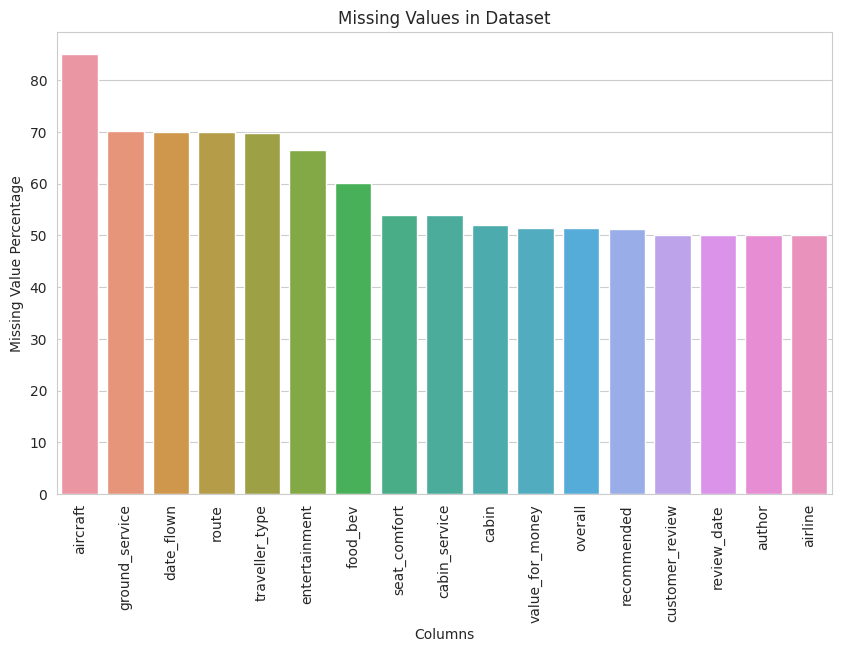

In [99]:
# Visualizing the missing values

def visualize_missing_values(data):
    # Calculate missing value percentages for each column
    missing_percentages = (data.isnull().sum() / len(data)) * 100
    
    # Sort columns by missing value percentages in descending order
    missing_percentages = missing_percentages.sort_values(ascending=False)
    
    # Filter columns with missing values
    missing_columns = missing_percentages[missing_percentages > 0]
    
    # Create a bar plot to visualize missing value percentages
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_columns.index, y=missing_columns)
    plt.xticks(rotation=90)
    plt.xlabel('Columns')
    plt.ylabel('Missing Value Percentage')
    plt.title('Missing Values in Dataset')
    plt.show()

# Call the function for our dataset
visualize_missing_values(df_Airline)


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [100]:
# Dataset Columns
df_Airline.columns.to_list


<bound method IndexOpsMixin.tolist of Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')>

In [101]:
# Dataset Describe
df_Airline.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,64017.0,5.145430,3.477532,1.0,1.0,5.0,9.0,10.0
seat_comfort,60681.0,2.952160,1.441362,1.0,1.0,3.0,4.0,5.0
cabin_service,60715.0,3.191814,1.565789,1.0,2.0,3.0,5.0,5.0
food_bev,52608.0,2.908170,1.481893,1.0,1.0,3.0,4.0,5.0
entertainment,44193.0,2.863372,1.507262,1.0,1.0,3.0,4.0,5.0
ground_service,39358.0,2.692820,1.612215,1.0,1.0,3.0,4.0,5.0
value_for_money,63975.0,2.943962,1.587370,1.0,1.0,3.0,4.0,5.0


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [102]:
# Check Unique Values for each variable.
column_list = df_Airline.columns.values.tolist()
no_unique=[]
for column_name in column_list:
  no_unique.append(df_Airline[column_name].nunique())
# Making DataFrame of indivisual column name with it's unique value
unique = pd.DataFrame(list(zip(column_list, no_unique)),
               columns =['variable', 'no. of uniques values'])
unique.head(10)

,variable,no. of uniques values
0,airline,81
1,overall,10
2,author,44069
3,review_date,3015
4,customer_review,61172
5,aircraft,2088
6,traveller_type,4
7,cabin,4
8,route,24549
9,date_flown,63


## 3. ***Data Wrangling***

### Data Wrangling Code

In [103]:
# Write your code to make your dataset analysis ready.
df_Airline.drop_duplicates(inplace = True)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

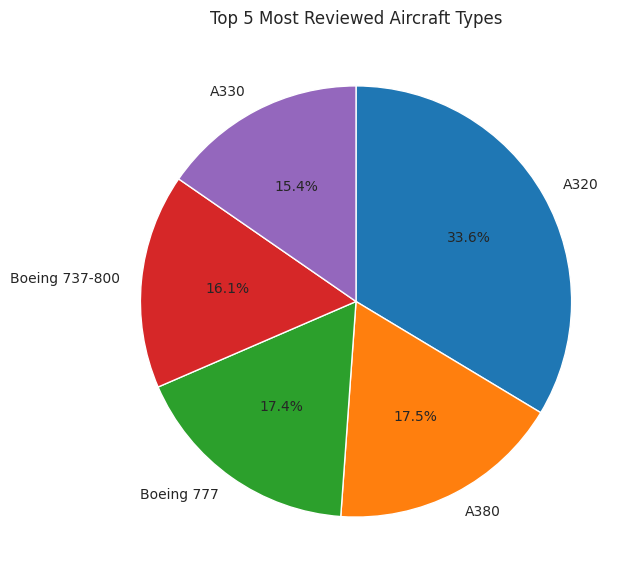

In [104]:
# Chart - 1 visualization code
# count the number of reviews for each aircraft type

aircraft_counts = df_Airline["aircraft"].value_counts()

top_aircraft = aircraft_counts.head(5)

# Graph

plt.pie(top_aircraft.values, labels=top_aircraft.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title("Top 5 Most Reviewed Aircraft Types")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

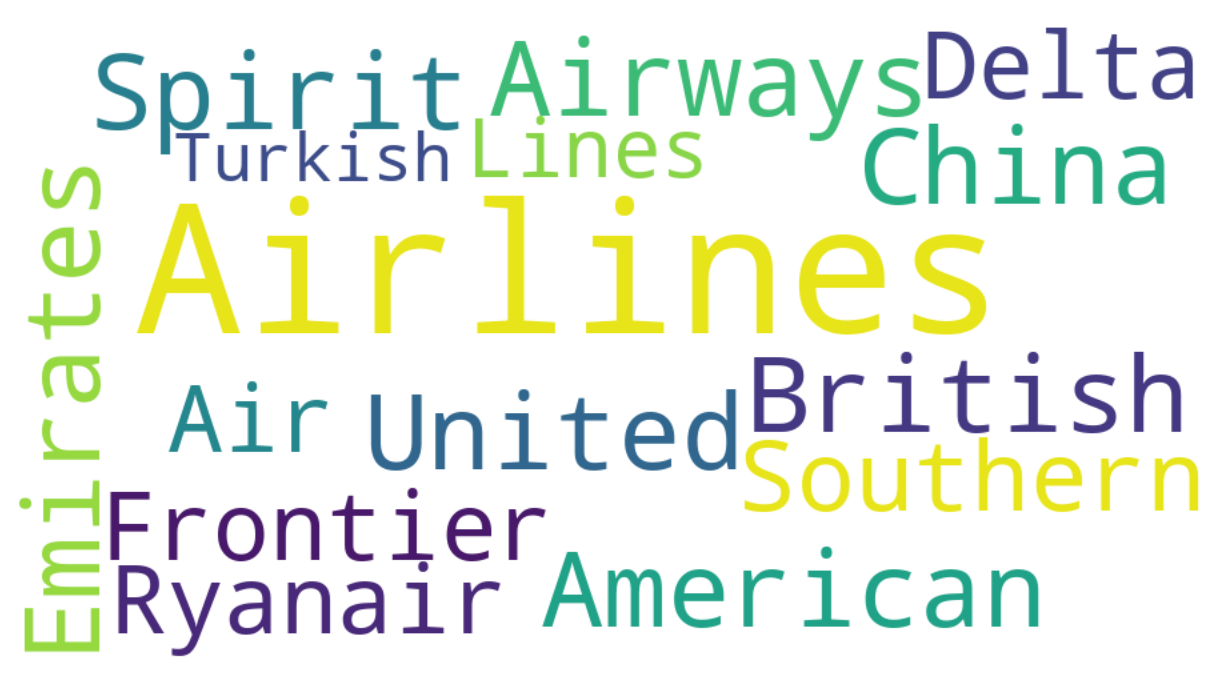

In [105]:
# Chart - 2 visualization code
# Count the occurrences of each airline in the dataset
airline_counts = df_Airline['airline'].value_counts()
airline_counts

top_airlines = list(airline_counts.index[:10])
text = ' '.join(top_airlines)


#WordCloud
wordcloud = WordCloud(width=900, height=500, background_color='white').generate(text)
                                                                              

plt.figure(figsize=(12, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

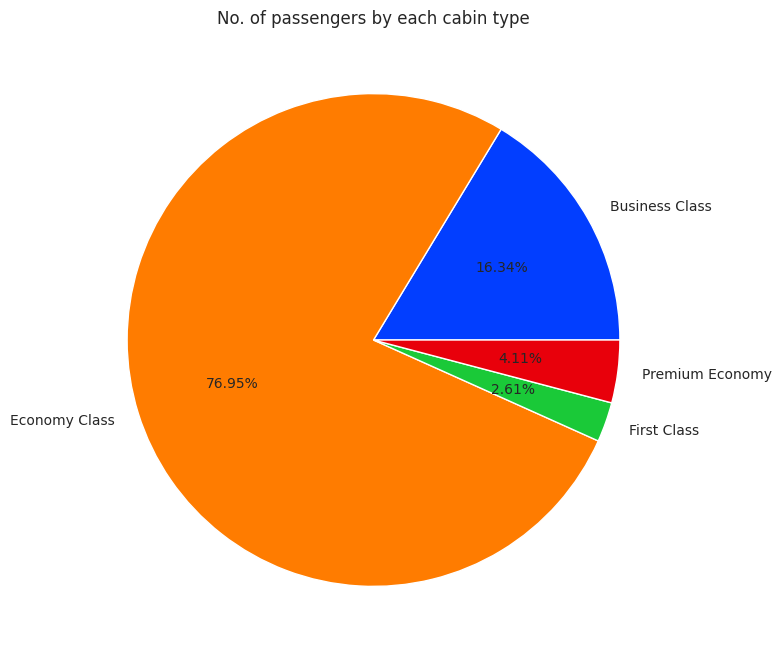

In [106]:
# Chart - 3 visualization code
passengers_by_cabin = df_Airline.groupby('cabin')['cabin'].count()
palette_color = sns.color_palette('bright')
plt.figure(figsize=(8, 8))
explode = [0.4, 0.2, 0.3, 0.5]
plt.pie(passengers_by_cabin, labels=passengers_by_cabin.index, colors=palette_color, autopct='%1.2f%%')
plt.title('No. of passengers by each cabin type')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

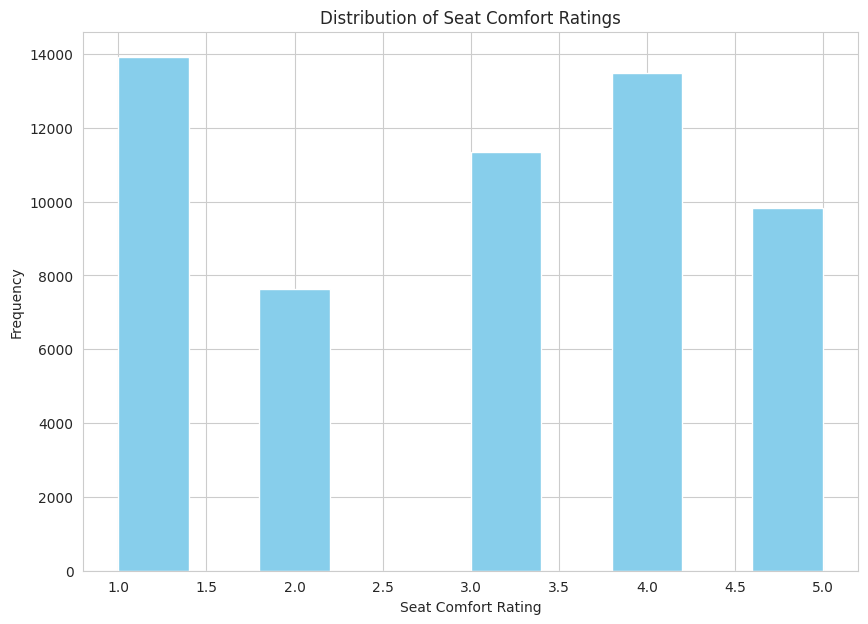

In [107]:
# Chart - 4 visualization code
# Distribution of seat comfort ratings for the airline
seat_comfort = df_Airline['seat_comfort']

#Graph
plt.hist(seat_comfort, bins=10, color='skyblue')
plt.xlabel('Seat Comfort Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Seat Comfort Ratings')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: xlabel='traveller_type', ylabel='value_for_money'>

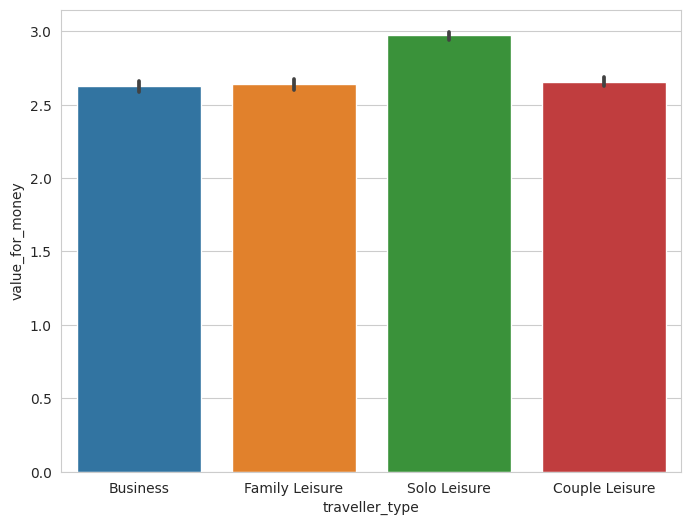

In [108]:
# Chart - 5 visualization code
# Which type of traveller type has good value for money

plt.figure(figsize=(8,6))
sns.barplot(x=df_Airline['traveller_type'],y=df_Airline['value_for_money'])


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

<Axes: xlabel='cabin'>

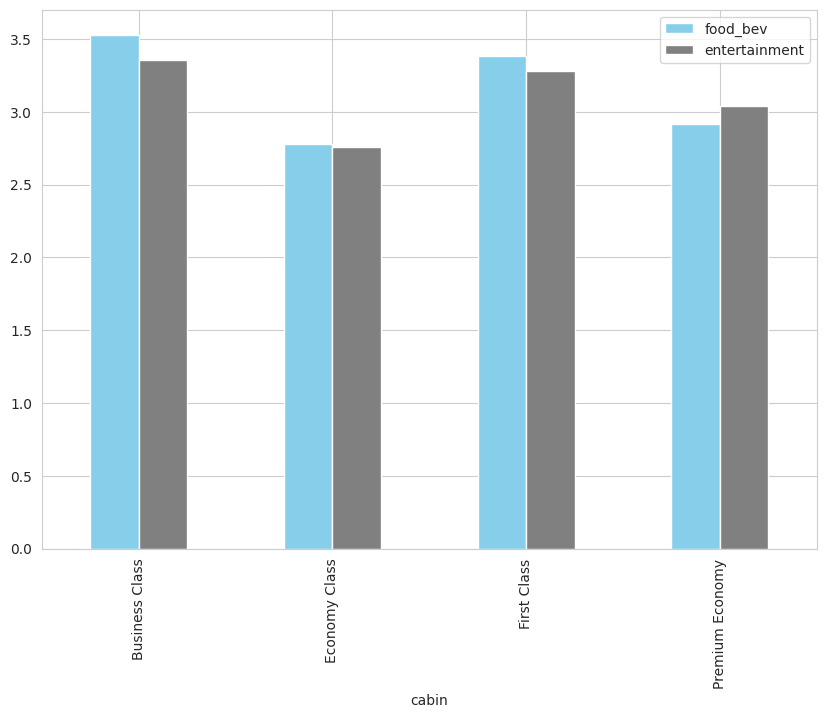

In [109]:
# Chart - 6 visualization code
# what is the average ratings of Food_bev and entertainment given by passenger in all types of cabin

cab_rate=df_Airline.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()

#Graph

plt.rcParams['figure.figsize']=(10,7)
cab_rate.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar", color=["skyblue", "gray"])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [110]:
# Chart - 7 visualization code
# calculate the mean rating for each cabin type

avg_ratings = df_Airline.groupby('cabin')['cabin_service'].mean()

#Graph

colors = ['gold', 'mediumturquoise', 'darkorange']
fig = go.Figure(data=[go.Pie(labels=avg_ratings.index, 
                             values=avg_ratings.values,
                             textinfo='label+percent',
                             marker=dict(colors=colors)
                             )])

fig.update_layout(title='Average Ratings by Cabin Type')
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

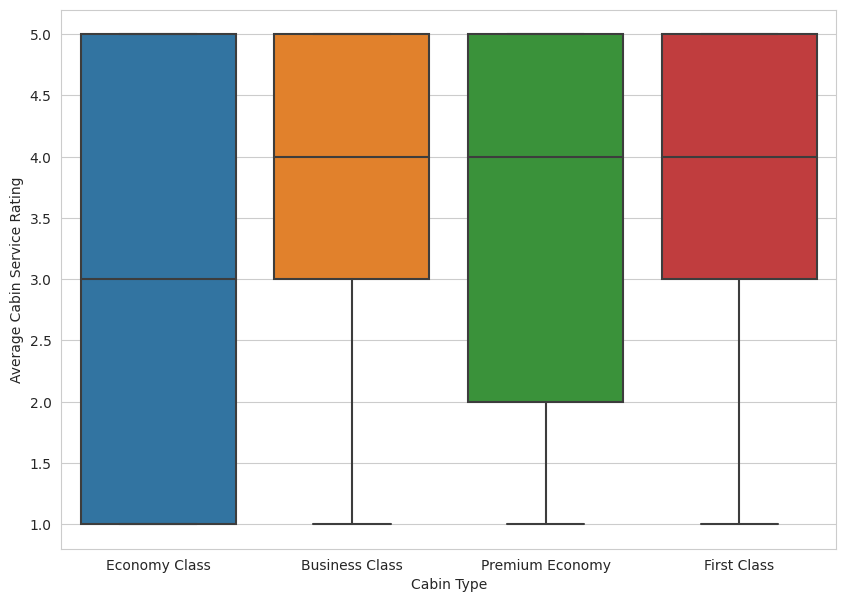

In [111]:
# Chart - 8 visualization code
sns.set_style('whitegrid')
ax = sns.boxplot(x='cabin', y='cabin_service', data=df_Airline)
ax.set(xlabel='Cabin Type', ylabel='Average Cabin Service Rating')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [112]:
# Chart - 9 visualization code
avg_ratings = df_Airline.groupby('cabin')['overall'].mean().reset_index()
fig = px.area(avg_ratings, x='cabin', y='overall', title='Average Ratings by Cabin')
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

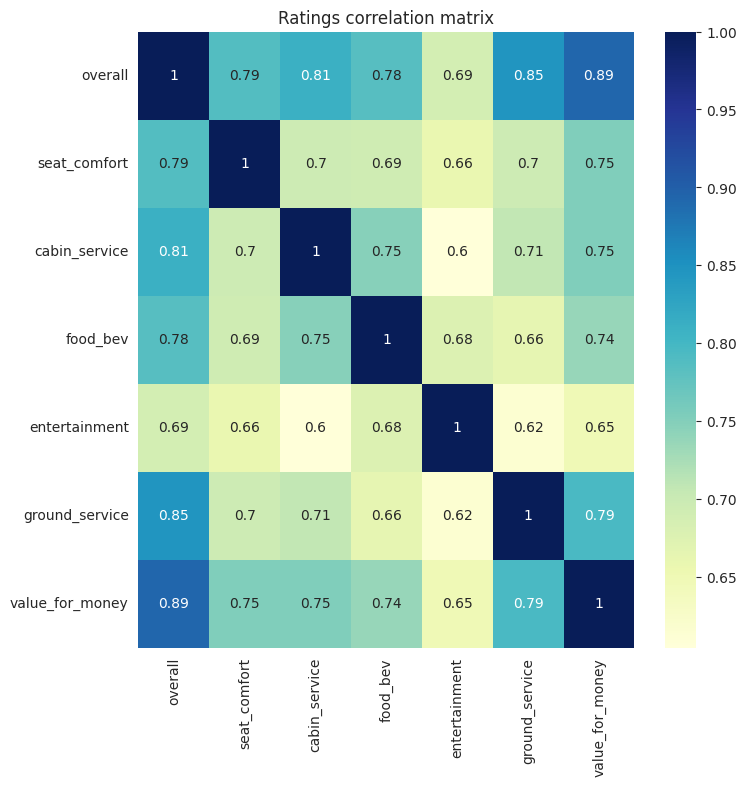

In [113]:
# 11. Corelation between overall rating with all other types of ratings
ratings = df_Airline[["overall", "seat_comfort", "cabin_service", "food_bev", "entertainment", "ground_service", "value_for_money"]]

#Graph
corr = ratings.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Ratings correlation matrix")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

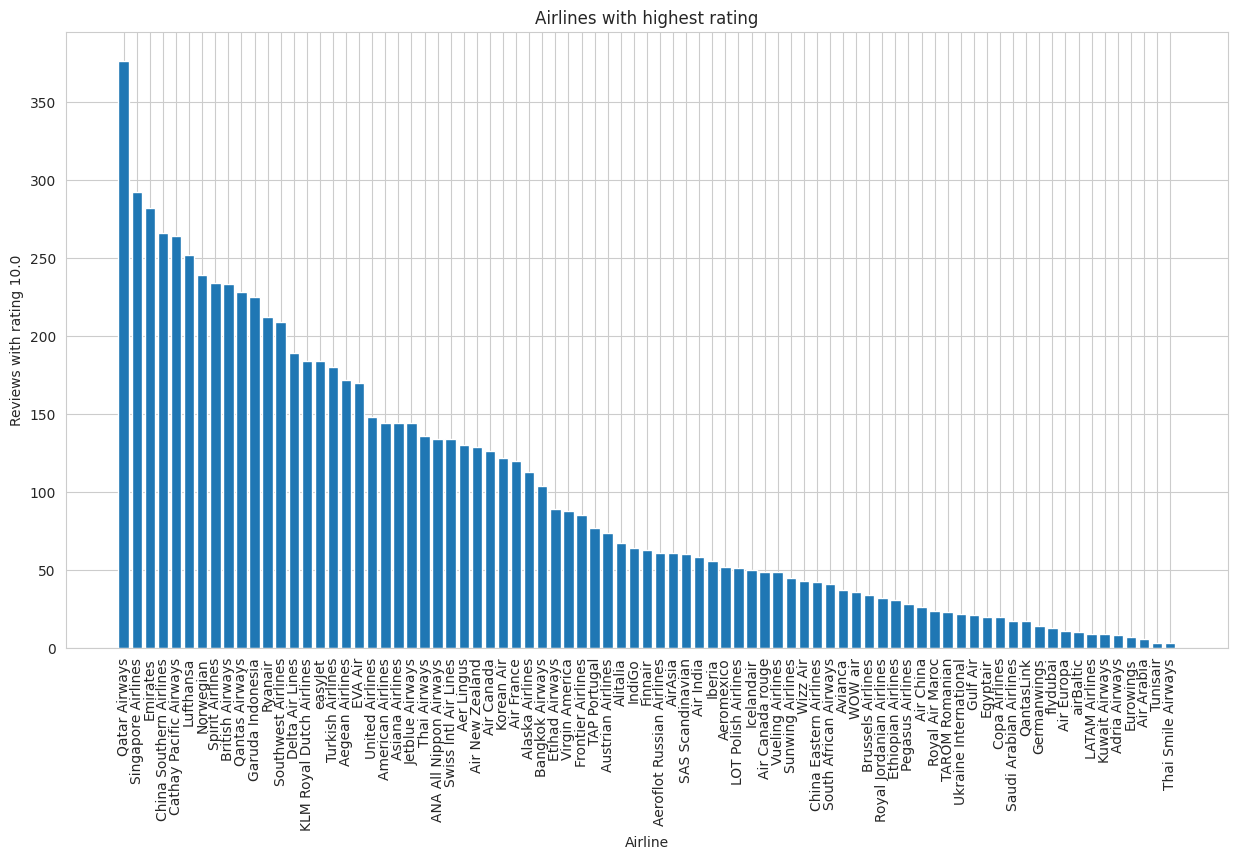

In [114]:
# Chart - 11 visualization code
# Group the reviews by route and count the number of reviews for each route
most_used_route = df_Airline.groupby(['overall','airline']).agg({'overall': ['count']})
most_used_route.columns = ['count']
most_used_route = most_used_route.reset_index()
most_used_route = most_used_route.set_index('overall')
most_used_route.head(10)

with_10_rating = most_used_route.loc[most_used_route.index == 10.0]
with_10_rating = with_10_rating.sort_values('count', ascending=False) 

# Bar plot for airline with 10 Ratings
plt.figure(figsize=(15,8))
plt.bar(with_10_rating['airline'], with_10_rating['count'])
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Reviews with rating 10.0')
plt.title('Airlines with highest rating')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

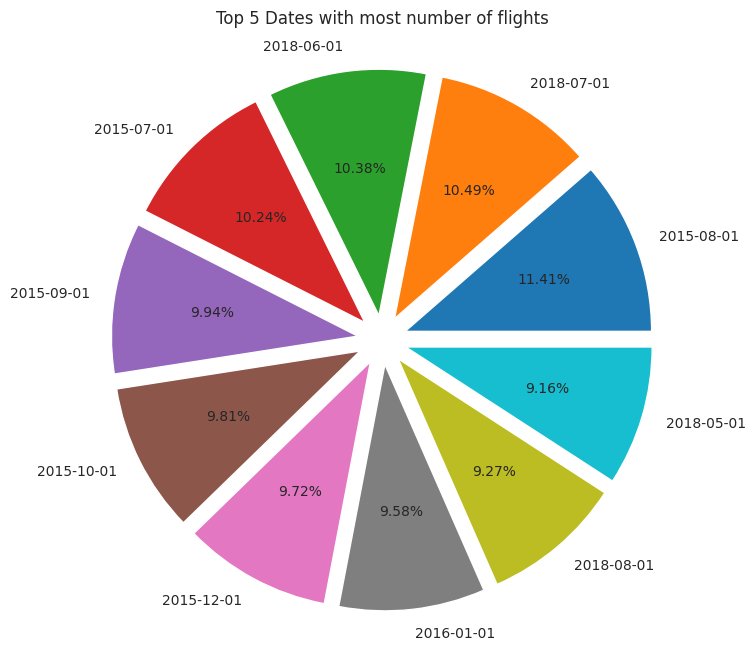

In [115]:
# Chart - 12 visualization code
# Top 10 highest no. of flight takeoff in a day
df_Airline['date_flown'] = pd.to_datetime(df_Airline['date_flown'])

most_no_flights = df_Airline.groupby('date_flown')['airline'].count()
top_five_dates = most_no_flights.sort_values(ascending=False).head(10)


#Graph
plt.figure(figsize=(8, 8))
data = top_five_dates.values
labels = top_five_dates.index.strftime('%Y-%m-%d')
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(data, labels=labels, explode=explode, autopct='%1.2f%%')
plt.title('Top 5 Dates with most number of flights')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

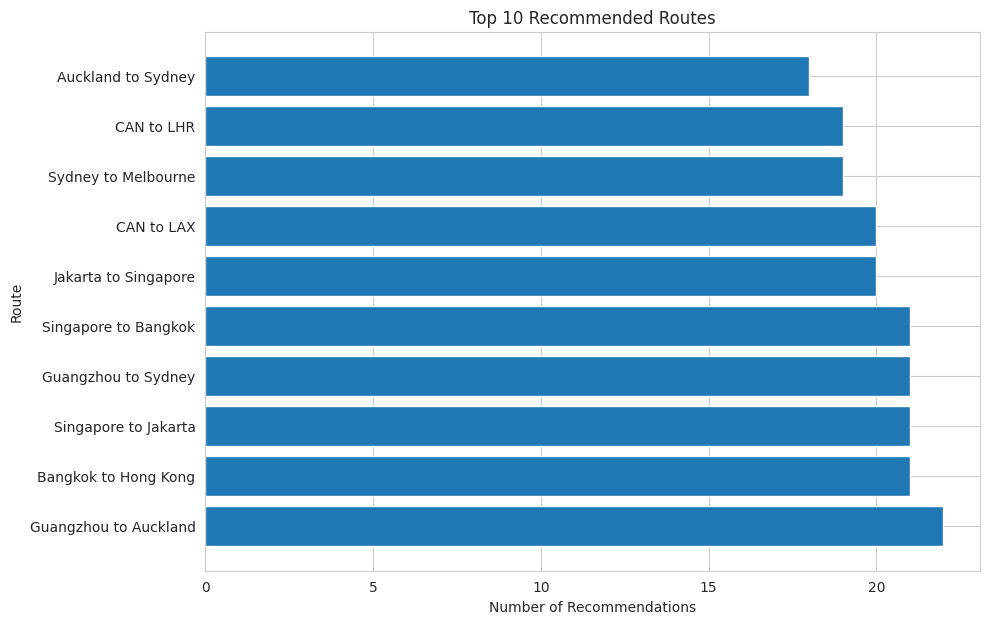

In [116]:
df_recommended = df_Airline[df_Airline['recommended'] == 'yes']
r_route = df_recommended['route'].value_counts()

t_10_routes = r_route.head(11)[1:]
t_10_routes

#Graph

plt.barh(t_10_routes.index, t_10_routes.values)
plt.title('Top 10 Recommended Routes')
plt.xlabel('Number of Recommendations')
plt.ylabel('Route')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

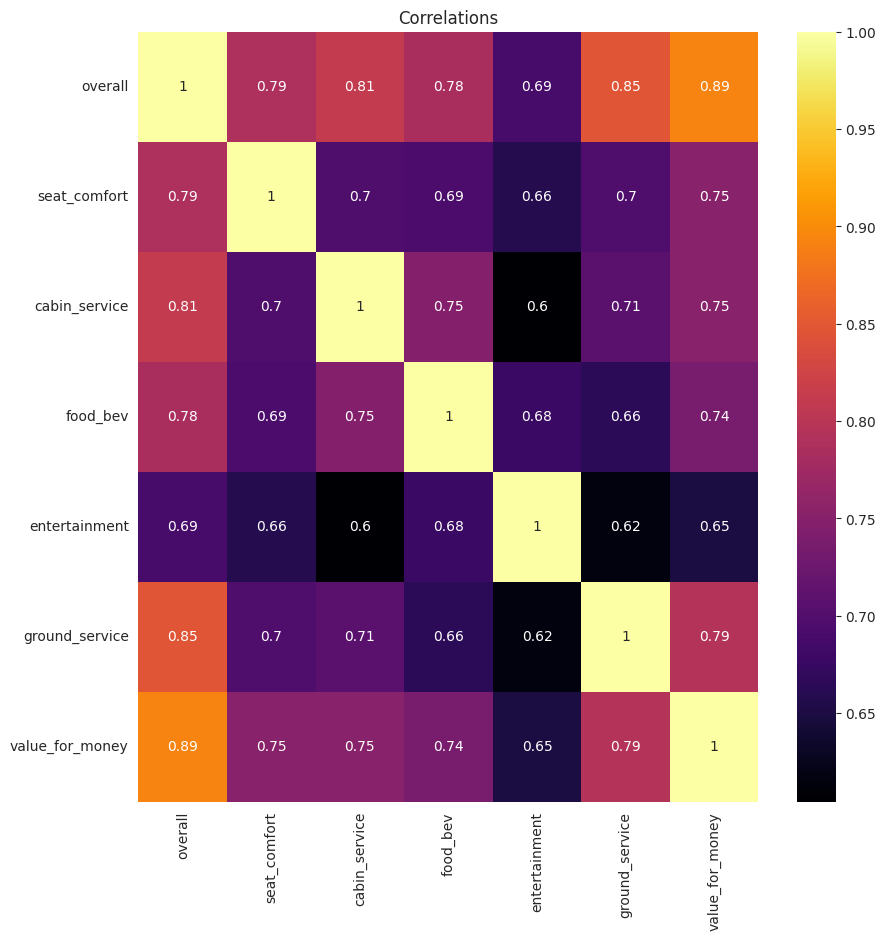

In [117]:
corr_matrix = df_Airline.corr()

# Graph
plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='inferno', annot=True)
plt.title('Correlations')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

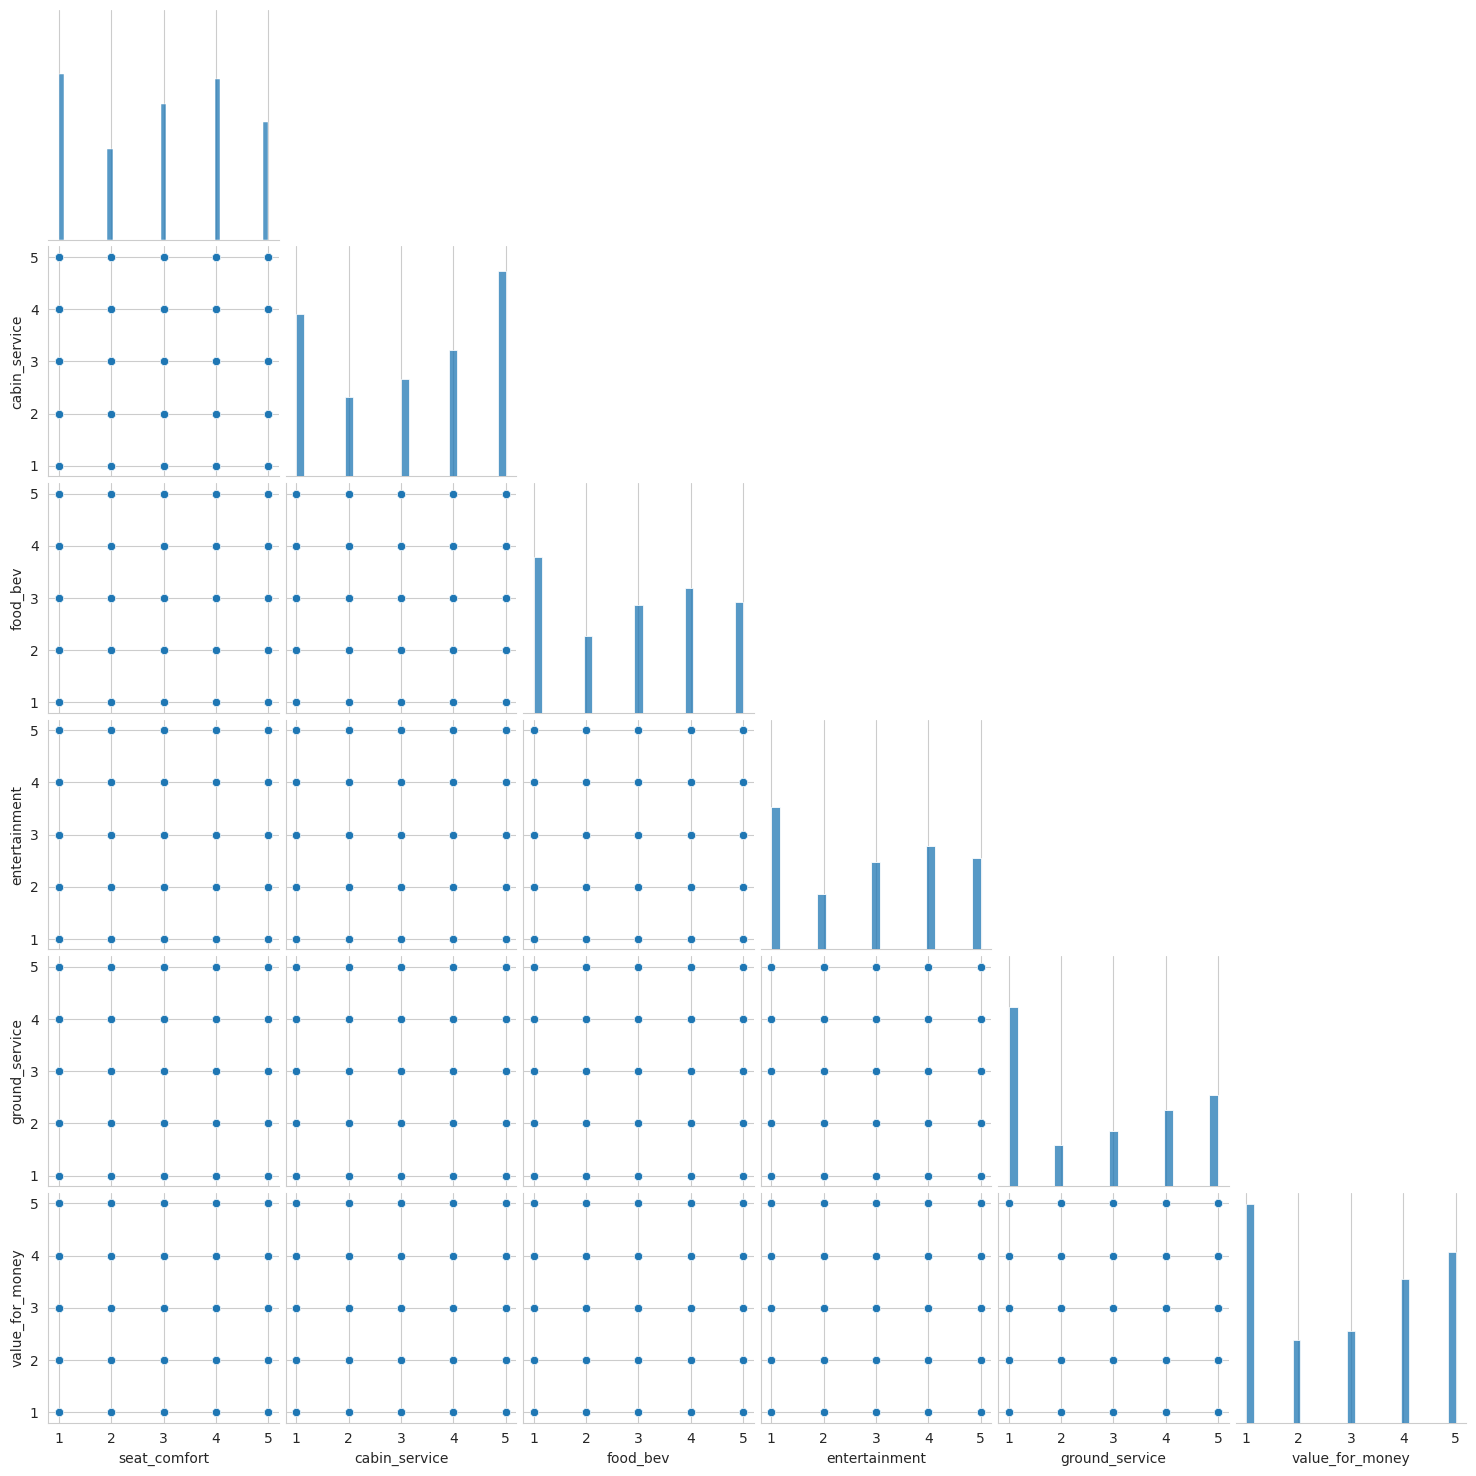

In [118]:
# Pair Plot visualization code
cols_rated = ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

#Graph
sns.pairplot(df_Airline[cols_rated], corner=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1.**Null Hypothesis:**There is no significant correlation between the overall rating of an airline and the ratings for seat comfort, cabin service, food and beverages, entertainment, and ground service.
#### 2.**Alternative Hypothesis:**There is a significant correlation between the overall rating of     an airline and the ratings for seat comfort, cabin service, food and beverages, entertainment, and ground service.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [119]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import pearsonr

# Select the relevant columns for analysis
req_columns = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service']
hypo_df = df_Airline[req_columns]

# Drop rows with missing values
hypo_df = hypo_df.dropna()

# Perform the correlation test
corr, p_value = pearsonr(hypo_df['overall'], hypo_df.iloc[:, 1:].mean(axis=1))

print("Correlation coefficient:", corr)
print("P-value:", p_value)

Correlation coefficient: 0.9108369612736413
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null :-** There is no significant difference in the ratings for seat comfort, cabin service, food and beverages, entertainment, and ground service between passengers who traveled in Business or First Class cabins and passengers who traveled in Economy Class.

**Alternate :-** There is significant difference in the ratings for seat comfort, cabin service, food and beverages, entertainment, and ground service between passengers who traveled in Business or First Class cabins and passengers who traveled in Economy Class.

#### 2. Perform an appropriate statistical test.

In [120]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy import stats

data = df_Airline[['cabin', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service']]
data = data.dropna()
economy = data[data['cabin'] == 'Economy Class']
business_first = data[data['cabin'].isin(['Business', 'First Class'])]

rating_categories = ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service']

for category in rating_categories:
    t_statistic, p_value = stats.ttest_ind(economy[category], business_first[category], equal_var=False)
    print(f"Category: {category}")
    print(f"  T-Statistic: {t_statistic}")
    print(f"  P-Value: {p_value}\n")

Category: seat_comfort
  T-Statistic: -18.287080219560234
  P-Value: 2.906126897823245e-62

Category: cabin_service
  T-Statistic: -13.128907312330098
  P-Value: 1.0998726743946814e-35

Category: food_bev
  T-Statistic: -11.425926287643769
  P-Value: 5.166129349760669e-28

Category: entertainment
  T-Statistic: -9.953666644049479
  P-Value: 4.96954658183965e-22

Category: ground_service
  T-Statistic: -12.17184272717082
  P-Value: 2.7716724922610593e-31



##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null :-**The date of the flight has no significant impact on the ratings and recommendations given by passengers.

**Alternate :-** The date of the flight has a significant impact on the ratings and recommendations given by passengers.

#### 2. Perform an appropriate statistical test.

In [121]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = df_Airline[['date_flown', 'overall', 'recommended']]
data = data.dropna()  # Remove rows with missing values

# Perform ANOVA test
model = ols('overall ~ C(date_flown)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Extract the p-value from the ANOVA table
p_value = anova_table['PR(>F)'][0]

# Print the p-value
print(f"P-Value: {p_value}")

P-Value: 0.0


In [122]:
#Added block
data = df_Airline[['date_flown', 'overall', 'recommended']]
data = data.dropna()

# Perform t-tests for each flight date
flight_dates = data['date_flown'].unique()

results = {}
for date in flight_dates:
    date_data = data[data['date_flown'] == date]
    t_statistic, p_value = stats.ttest_1samp(date_data['overall'], data['overall'].mean())
    results[date] = {'T-Statistic': t_statistic, 'P-Value': p_value}

# Print the results
for date, result in results.items():
    print(f"Flight Date: {date}")
    print(f"  T-Statistic: {result['T-Statistic']}")
    print(f"  P-Value: {result['P-Value']}\n")

Flight Date: 2019-05-01T00:00:00.000000000
  T-Statistic: -6.645323648701542
  P-Value: 1.331328920812345e-10

Flight Date: 2019-04-01T00:00:00.000000000
  T-Statistic: -11.78548130571284
  P-Value: 9.23828471953554e-30

Flight Date: 2019-02-01T00:00:00.000000000
  T-Statistic: -5.651525100457252
  P-Value: 2.3754263114970158e-08

Flight Date: 2018-10-01T00:00:00.000000000
  T-Statistic: -5.182960221417487
  P-Value: 2.777372310433994e-07

Flight Date: 2019-03-01T00:00:00.000000000
  T-Statistic: -4.935929812205495
  P-Value: 9.937328411467806e-07

Flight Date: 2018-09-01T00:00:00.000000000
  T-Statistic: -6.30064318658833
  P-Value: 4.870045450629515e-10

Flight Date: 2018-04-01T00:00:00.000000000
  T-Statistic: -2.3395456307366924
  P-Value: 0.019576633344110476

Flight Date: 2019-01-01T00:00:00.000000000
  T-Statistic: -4.391452989430205
  P-Value: 1.2862807134707501e-05

Flight Date: 2018-11-01T00:00:00.000000000
  T-Statistic: -5.536124235378816
  P-Value: 4.251781450105876e-08

F

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [123]:
# Handling Missing Values & Missing Value Imputation
new_df = df_Airline.copy()

# Replace missing values with mean values
new_df['overall'].fillna(df_Airline['overall'].mean(), inplace=True)
new_df['seat_comfort'].fillna(df_Airline['seat_comfort'].mean(), inplace=True)
new_df['cabin_service'].fillna(df_Airline['cabin_service'].mean(), inplace=True)
new_df['food_bev'].fillna(df_Airline['food_bev'].mean(), inplace=True)
new_df['entertainment'].fillna(df_Airline['entertainment'].mean(), inplace=True)
new_df['ground_service'].fillna(df_Airline['ground_service'].mean(), inplace=True)
new_df['value_for_money'].fillna(df_Airline['value_for_money'].mean(), inplace=True)

new_df.head(2)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,5.164863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849,NaN
1,Turkish Airlines,7.000000,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01,4.000000,5.000000,4.000000,4.000000,2.000000,4.000000,yes


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [124]:
# Handling Outliers & Outlier treatments
# Specify the columns to check for outliers
numerical_columns = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Iterate over each numerical column
for column in numerical_columns:
    q1 = df_Airline[column].quantile(0.25)
    q3 = df_Airline[column].quantile(0.75)
    iqr = q3 - q1

    # Determine the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Drop outliers
    df_Airline = df_Airline[(df_Airline[column] >= lower_bound) & (df_Airline[column] <= upper_bound)]

In [125]:
df_outliers = df_Airline.copy()

# Define z-score threshold for outlier detection
z_score_threshold = 3  # Adjust as needed

# Loop through each numeric column and remove outliers
numeric_columns = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

for column in numeric_columns:
    z_scores = np.abs((df_Airline[column] - df_Airline[column].mean()) / df_Airline[column].std())
    df_outliers = df_outliers[z_scores <= z_score_threshold]

# Reset the index of the new DataFrame
df_outliers.reset_index(drop=True, inplace=True)

df_outliers.head(2)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01,4.0,1.0,1.0,1.0,1.0,1.0,no


##### What all outlier treatment techniques have you used and why did you use those techniques?

In [126]:
df_outliers.shape

(22850, 17)

Answer Here.

### 3. Categorical Encoding

In [127]:
# Encode your categorical columns
df_outliers['recommended'].replace({'yes':1,'no':0},inplace=True)

# Separate numeric and non-numeric columns
numeric_df = df_outliers.select_dtypes(include='number')
non_numeric_df = df_outliers.select_dtypes(exclude='number')

non_numeric_cols = df_outliers.select_dtypes(exclude='number').columns.tolist()
numeric_cols = df_outliers.select_dtypes(include='number').columns.tolist()


In [128]:
# Select your features wisely to avoid overfitting
correlation_matrix=df_outliers.corr()

threshold = 0.5


correlated_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

correlated_features

{'cabin_service',
 'entertainment',
 'food_bev',
 'ground_service',
 'seat_comfort',
 'value_for_money'}

In [129]:
# Drop non-numeric columns
numeric_columns = df_outliers.select_dtypes(include=['float64', 'int64']).columns
df_outliers = df_outliers[numeric_columns]

df_outliers.head(2)

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,7.0,4.0,5.0,4.0,4.0,2.0,4.0,1
1,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0


In [130]:
df_AL = df_outliers.copy()
df_AL.head()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,7.0,4.0,5.0,4.0,4.0,2.0,4.0,1
1,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0
2,3.0,1.0,4.0,1.0,3.0,1.0,2.0,0
3,10.0,4.0,5.0,5.0,5.0,5.0,5.0,1
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [131]:
# Expand Contraction

#### 2. Lower Casing

In [132]:
# Lower Casing

#### 3. Removing Punctuations

In [133]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [134]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [135]:
# Remove Stopwords

In [136]:
# Remove White spaces

#### 6. Rephrase Text

In [137]:
# Rephrase Text

#### 7. Tokenization

In [138]:
# Tokenization

#### 8. Text Normalization

In [139]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [140]:
# POS Taging

#### 10. Text Vectorization

In [141]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [142]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [143]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [144]:
# Transform Your data

### 6. Data Scaling

In [145]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [146]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [147]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [148]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

In [149]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df_AL.drop('recommended', axis=1)
y = df_AL['recommended']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [150]:
# Scaling your data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ***7. ML Model Implementation***

### **Logistic Regression**

In [151]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Logistic regression model
logreg = LogisticRegression()

# Fit the Algorithm
logreg.fit(X_train_scaled, y_train)

# prediction
y_pred = logreg.predict(X_test_scaled)

# Predict on the model
y_pred = logreg.predict(X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy: 0.9557986870897155
Precision: 0.9495683780099955
Recall: 0.958276020174232
ROC AUC: 0.9559065324814232


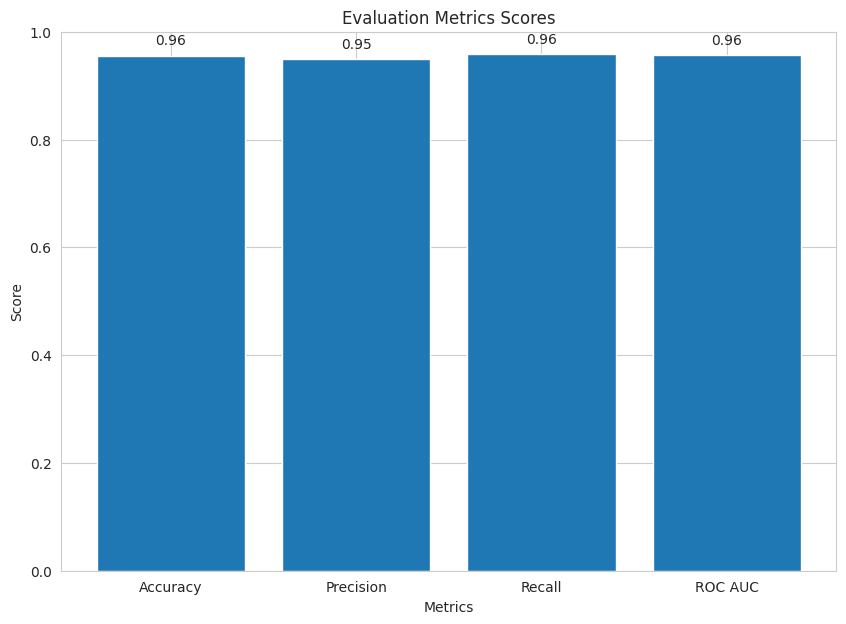

In [152]:
# Visualizing evaluation Metric Score chart

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# precision score
precision_LR = precision_score(y_test, y_pred)
print("Precision:", precision_LR)

# recall score
recall_LR = recall_score(y_test, y_pred)
print("Recall:", recall_LR)

# ROC AUC score
roc_auc_LR = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc_LR)

import matplotlib.pyplot as plt
import numpy as np

# Define the evaluation metrics and scores
metrics = ["Accuracy", "Precision", "Recall", "ROC AUC"]
scores = [accuracy, precision_LR, recall_LR, roc_auc_LR]

import matplotlib.pyplot as plt
import numpy as np

def plot_score_chart(metrics, scores):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Set the x-axis ticks and labels
    x = np.arange(len(metrics))
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)

    # Set the y-axis limits
    ax.set_ylim([0, 1])

    # Plot the scores as bars
    ax.bar(x, scores)

    # Add labels to each bar
    for i, score in enumerate(scores):
        ax.text(i, score + 0.02, f"{score:.2f}", ha="center")

    # Set the chart title and axis labels
    ax.set_title("Evaluation Metrics Scores")
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Score")

    # Display the chart
    plt.show()

plot_score_chart(metrics, scores)

#### 2. Cross- Validation & Hyperparameter Tuning

In [153]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='recall')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate the mean score
mean_score = scores.mean()
print("Mean Score:", mean_score)

# Fit the Algorithm

# Predict on the model

Cross-Validation Scores: [0.95674157 0.96292135 0.95224719 0.95786517 0.95222035]
Mean Score: 0.956399125881855


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **Decision tree classifier**

In [154]:
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the model
dt_classifier.fit(X_train_scaled, y_train)

# predictions
y_pred = dt_classifier.predict(X_test_scaled)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy: 0.9326039387308533
Precision: 0.9274303970789594
Recall: 0.9316827143512151
ROC AUC: 0.9325638351998854


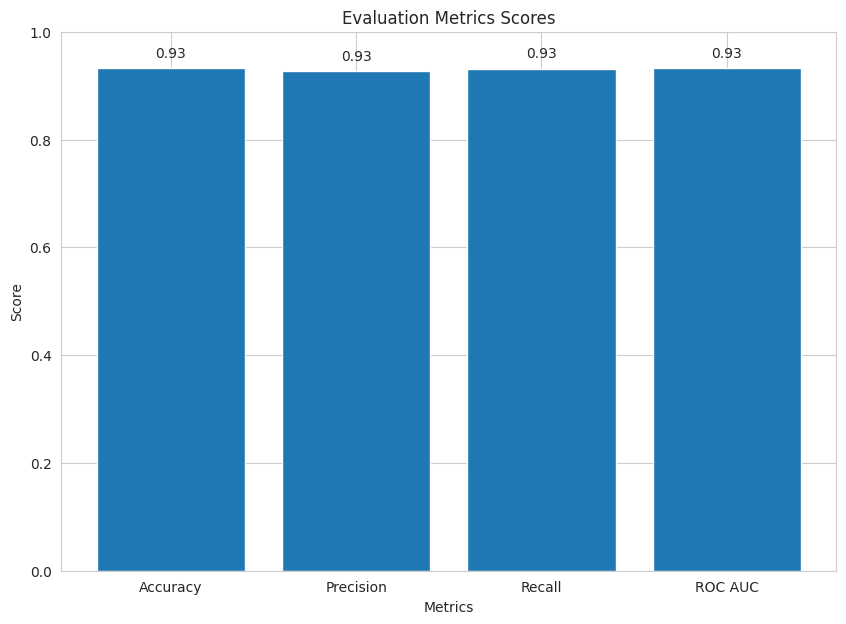

In [155]:
# Visualizing evaluation Metric Score chart

# accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_dt)

# precision score
precision_dt = precision_score(y_test, y_pred)
print("Precision:", precision_dt)

# recall score
recall_dt = recall_score(y_test, y_pred)
print("Recall:", recall_dt)

# ROC AUC score
roc_auc_dt = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc_dt)

metrics_2 = ["Accuracy", "Precision", "Recall", "ROC AUC"]
scores_2 = [accuracy_dt, precision_dt, recall_dt, roc_auc_dt]

# call the function for visulizing evalution matrics
plot_score_chart(metrics_2, scores_2)

#### 2. Cross- Validation & Hyperparameter Tuning

In [156]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# hyperparameters
h_parameter = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
     }

# DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

# GridSearchCV object
grid_search = GridSearchCV(model, h_parameter, cv=5, scoring='accuracy')

# Fit the GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# best parameters
best_params = grid_search.best_params_
print('Best parameters:', best_params)

# Fit the Algorithm
good_model = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                    min_samples_split=best_params['min_samples_split'],
                                    min_samples_leaf=best_params['min_samples_leaf'],
                                    random_state=0)
good_model.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = good_model.predict(X_test_scaled)

# Scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy Score: 0.9542669584245077
Precision: 0.9502283105022831
Recall: 0.9541494727189362
ROC AUC: 0.95426184393586


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### **Naive Bayes**

In [157]:
# ML Model - 3 Implementation
from sklearn.naive_bayes import GaussianNB

# Naive Bayes model
naive_bayes = GaussianNB()

# Fit the Algorithm
naive_bayes.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = naive_bayes.predict(X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy Score: 0.9542669584245077
Precision: 0.9502283105022831
Recall: 0.9541494727189362
ROC AUC: 0.95426184393586


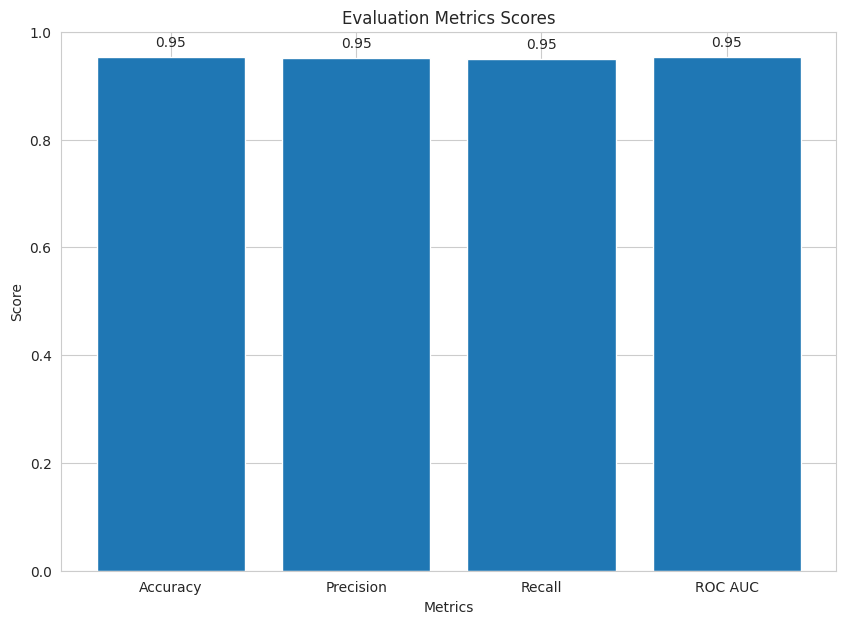

In [158]:
# Visualizing evaluation Metric Score chart
# Scores
accuracy_naive = accuracy_score(y_test, y_pred)
precision_naive = precision_score(y_test, y_pred)
recall_naive = recall_score(y_test, y_pred)
roc_auc_naive = roc_auc_score(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

metrics_2 = ["Accuracy", "Precision", "Recall", "ROC AUC"]
scores_2 = [accuracy_naive, precision_naive, recall_naive, roc_auc_naive]

#call the function for visulizing evalution matrics score
plot_score_chart(metrics_2, scores_2)

#### 2. Cross- Validation & Hyperparameter Tuning

In [159]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score

# Fit the Algorithm
# Perform cross-validation
scores = cross_val_score(naive_bayes, X_train_scaled, y_train, cv=5, scoring='accuracy')

# calculate average accuracy of all five folds 
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.9541575492341356


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [160]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [161]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***